Gentoo: максимум = 20
Adelie: максимум = 32
Chinstrap: максимум = 19
Общий максимум для оси Y: 32


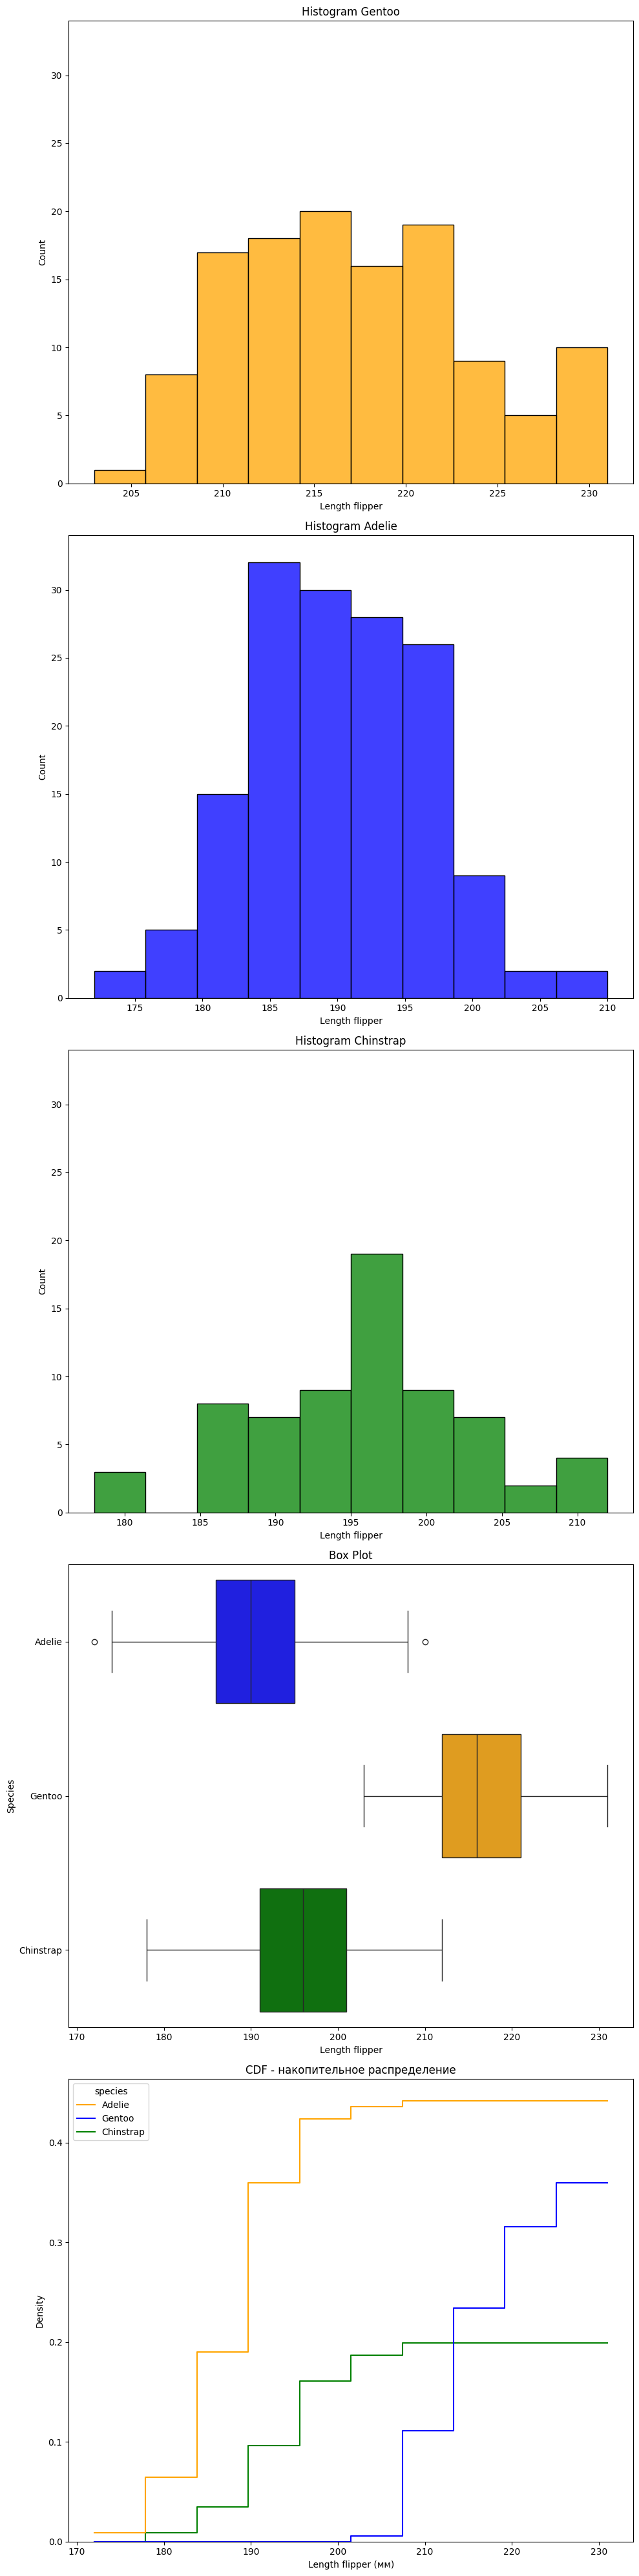

Text(69.0, 0.5, '%')

In [ ]:

import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns




input_file = "penguins.csv"
missing_file = "missing.csv"
M = "NA"

df = pl.read_csv(input_file, null_values=[M])

max_count = 0
species_list = ['Gentoo', 'Adelie', 'Chinstrap']

for species in species_list:

    species_df = df.filter(pl.col('species') == species)
    values = species_df['flipper_length_mm'].drop_nulls()
    
    if len(values) > 0:
       
        min_val = values.min()
        max_val = values.max()
        bin_width = (max_val - min_val) / 10
        
       
        counts = [0] * 10
        for val in values:
       
            bin_idx = min(int((val - min_val) / bin_width), 9)
            counts[bin_idx] += 1
        
 
        species_max = max(counts)
        max_count = max(max_count, species_max)
        
        print(f"{species}: максимум = {species_max}")

print(f"Общий максимум для оси Y: {max_count}")


fig, axes = plt.subplots(5, 1, figsize=(10, 40))


gentoo_df = df.filter(pl.col('species') == 'Gentoo')
sns.histplot(
    ax=axes[0], 
    data=gentoo_df.to_pandas(), 
    x="flipper_length_mm",
    color='orange',
    bins=10
)
axes[0].set_ylim(0, max_count + 2)
axes[0].set_title('Histogram Gentoo')
axes[0].set_xlabel('Length flipper')
axes[0].set_ylabel('Count')


adelie_df = df.filter(pl.col('species') == 'Adelie')
sns.histplot(
    ax=axes[1], 
    data=adelie_df.to_pandas(), 
    x="flipper_length_mm",
    color='blue',
    bins=10
)
axes[1].set_ylim(0, max_count + 2)
axes[1].set_title('Histogram Adelie')
axes[1].set_xlabel('Length flipper')
axes[1].set_ylabel('Count')


chinstrap_df = df.filter(pl.col('species') == 'Chinstrap')
sns.histplot(
    ax=axes[2], 
    data=chinstrap_df.to_pandas(), 
    x="flipper_length_mm",
    color='green',
    bins=10
)
axes[2].set_ylim(0, max_count + 2)
axes[2].set_title('Histogram Chinstrap')
axes[2].set_xlabel('Length flipper')
axes[2].set_ylabel('Count')

sns.boxplot(
    ax=axes[3], 
    x="flipper_length_mm", 
    y="species",
    hue="species",
    palette=["blue", "orange", "green"], 
    data=df.to_pandas()
)
axes[3].set_title('Box Plot')
axes[3].set_xlabel('Length flipper')
axes[3].set_ylabel('Species')


# 5. CDF график
sns.histplot(
    ax=axes[4], 
    data=df.to_pandas(), 
    x="flipper_length_mm",
    hue="species", 
    element="step", 
    fill=False,
    cumulative=True, 
    stat="density",
    palette=["orange", "blue", "green"]
)
axes[4].set_title('CDF - накопительное распределение')
axes[4].set_xlabel('Length flipper (мм)')
axes[4].set_ylabel('Density')

plt.tight_layout()
plt.show()


sns.boxplot(ax=axes[3], x="flipper_length_mm", y="species",hue="species",   palette=["blue","orange",  "green"], data=df)
axes[3].set_title('Box Plot')
axes[3].set_xlabel('Length flipper')
axes[3].set_ylabel('Species')


sns.histplot(
ax=axes[4], 
data=df, 
x="flipper_length_mm",
hue="species", 
element="step", 
fill=False,
cumulative=True, 
stat="density", 

)
axes[4].set_title('Box Plot cdf Gentoo')
axes[4].set_xlabel('Length flipper)')
axes[4].set_ylabel('%')

